* 인공지능은 함수적 원리를 이용

- 신경 --입력--> 신경 --출력--> 신경


* y = ax

- vector(수면시간, 운동시간, 칼로리 섭취량)  x  "matrix(함수)"  =  vector(체중, 혈압)


* 입력-출력 사이에 층위를 더할 수도 있다.


* 인공지능의 대표 선수 인공 신경망

어떤 입력을 출력으로 예측하는 함수

입력과 출력은 벡터

함수는 행렬

데이터만 있으면 행렬을 추정해낼 수 있음

이 행렬 자체가 인공지능임


# import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# data preparation and visualization

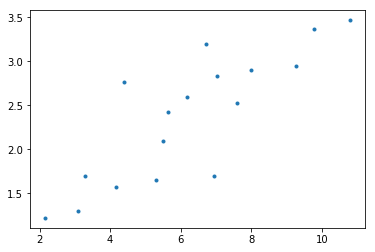

In [2]:
data = pd.read_csv('regression.csv')
X = data ['X']
Y = data ['Y']
plt.plot(X,Y,'.')

# create model

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.compile(optimizer='sgd', loss='mse')

* 모든 종류의 입력 방식은 sequential?

* 1은 y의 개수 input_shape은 x의 개수

* Dense(1 .. 출력부 shape=1은 입력부

--> y=ax+b를 만든 것. 간단한 인공신경망을 만든 것이다.

* loss = 출력부와 실제 정답값과의 차이. loss를 정의해주는 다양한 방법 중 한 가지.

# train model

In [9]:
model.fit(X,Y)

17/17 [==============================] - 1s 33ms/sample - loss: 100.9703


* 총 데이터를 통해 계산되어 나옴

* a와 b를 훈련시켰다.

# model prediction

In [10]:
x =[1, 2, 3, 4, 5, ,6, 7, 8, 9, 10]
y = model.predict(x)
plt.plot(X, Y, '.')
plt.plot(x, y, 'x')

SyntaxError: invalid syntax (<ipython-input-10-dce2eecea3ab>, line 1)

* 시스템을 만들고 출력이 어떻게 나올 지 모르는 상태에서 입력을 넣는 것.


# what are a and b in y = ax + b?

In [11]:
weight = model.layer[0].get_weights()
print(weight)

AttributeError: 'Sequential' object has no attribute 'layer'

--> 인공신경망 = 함수